# Data Preparation for Nfstream Features

- [remove column](#1---remove-unnecessary-columns)
- [imbalance dataset](#2---imbalance-data)
- [add label](#3---add-label)
- [save as csv](#4---save-dataset-as-csv)
- [Tagging](#5---tagging)
- [format as json](#6---format-as-json)

In [1]:
import pandas as pd
import glob, os
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### 1 - Remove unnecessary columns

In [2]:
colname=['id', 'expiration_id', 'src_ip', 'src_mac', 'src_oui', 'src_port',
       'dst_ip', 'dst_mac', 'dst_oui', 'dst_port', 'protocol', 'ip_version',
       'vlan_id', 'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst_min_piat_ms',
       'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms', 'src2dst_max_piat_ms',
       'dst2src_min_piat_ms', 'dst2src_mean_piat_ms', 'dst2src_stddev_piat_ms',
       'dst2src_max_piat_ms', 'bidirectional_syn_packets',
       'bidirectional_cwr_packets', 'bidirectional_ece_packets',
       'bidirectional_urg_packets', 'bidirectional_ack_packets',
       'bidirectional_psh_packets', 'bidirectional_rst_packets',
       'bidirectional_fin_packets', 'src2dst_syn_packets',
       'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets',
       'src2dst_ack_packets', 'src2dst_psh_packets', 'src2dst_rst_packets',
       'src2dst_fin_packets', 'dst2src_syn_packets', 'dst2src_cwr_packets',
       'dst2src_ece_packets', 'dst2src_urg_packets', 'dst2src_ack_packets',
       'dst2src_psh_packets', 'dst2src_rst_packets', 'dst2src_fin_packets',
       'application_name', 'application_category_name',
       'application_is_guessed', 'requested_server_name', 'client_fingerprint',
       'server_fingerprint', 'user_agent', 'content_type', 'device', 'label']

len(colname)

87

In [2]:
cname=['id', 'expiration_id','src_ip', 'src_mac', 'src_oui','sp',
       'dst_ip', 'dst_mac', 'dst_oui','dp', 'ptcl', 'ipv', 
       'vln','tnnl', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bi_dur',
       'bi_pkt', 'bi_byte', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 's2d_dur', 's2d',
       's2d_byte', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'd2s_dur', 'd2s', 'd2s_byte', 'bi_min_ps', 'bi_mean_ps',
       'bi_std_ps', 'bi_max_ps', 's2d_min_ps',
       's2d_mean_ps', 's2d_std_ps', 's2d_max_ps',
       'd2s_min_ps', 'd2s_mean_ps', 'd2s_std_ps',
       'd2s_max_ps', 'bi_min_pi_ms',
       'bi_mean_pi_ms', 'bi_std_pi_ms',
       'bi_max_pi_ms', 's2d_min_pi_ms',
       's2d_mean_pi_ms', 's2d_std_pi_ms', 's2d_max_pi_ms',
       'd2s_min_pi_ms', 'd2s_mean_pi_ms', 'd2s_std_pi_ms',
       'd2s_max_pi_ms', 'bi_syn',
       'bi_cwr', 'bi_ece',
       'bi_urg', 'bi_ack',
       'bi_psh', 'bi_rst',
       'bi_fin', 's2d_syn',
       's2d_cwr', 's2d_ece', 's2d_urg',
       's2d_ack', 's2d_psh', 's2d_rst',
       's2d_fin', 'd2s_syn', 'd2s_cwr',
       'd2s_ece', 'd2s_urg', 'd2s_ack',
       'd2s_psh', 'd2s_rst', 'd2s_fin',
       'app_name', 'app_cat', 'application_is_guessed',
       'req_server_name', 'client_fingerprint', 'server_fingerprint',
       'user_agent', 'content_type', 'device', 'label']

len(cname)

87

In [3]:
source = "/mnt/c/Users/iotfs/OneDrive - Universiti Malaya/dataset/Dataset_csv/unsw/nfstream/dataset.csv"

In [4]:
#parse from nfstream
#df = NFStreamer(source,statistical_analysis=True,accounting_mode=1,idle_timeout=10,active_timeout=30,).to_pandas()

#load csv
df = pd.read_csv(open(source,'r'),delimiter=',',names=cname,skiprows=1)
#df.head()

/tmp/ipykernel_16018/3254069501.py:5: DtypeWarning: Columns (80,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(open(source,'r'),delimiter=',',names=cname,skiprows=1)


In [5]:
def drop_columns(df):
    return df.drop(columns=["id","expiration_id","src_ip",
    "src_mac","src_oui","dst_ip","dst_mac","dst_oui","application_is_guessed","bidirectional_first_seen_ms",
    "bidirectional_last_seen_ms","src2dst_first_seen_ms","src2dst_last_seen_ms","dst2src_first_seen_ms",
    "dst2src_last_seen_ms","user_agent"#,"device","label"
    ])

# df1=drop_columns(df)


In [6]:
df_X=drop_columns(df)

In [7]:
df_X=df_X.round(decimals=2)


#### 2 - Imbalance data

<AxesSubplot:>

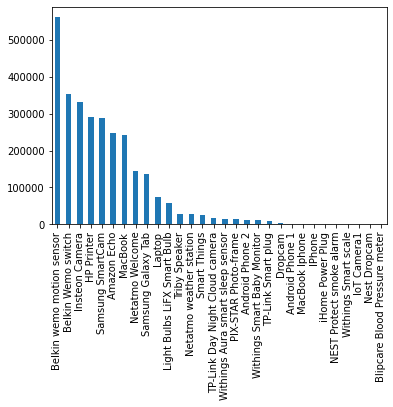

In [8]:
def counter_device(df):
    return df['device'].value_counts()

counter_device(df_X).plot(kind='bar')

In [9]:
df_Y=df['device']

In [10]:
sampling_strategy_rus ={"Belkin wemo motion sensor":50000,
"Belkin Wemo switch":50000,
"Insteon Camera":40000,
"HP Printer":50000,
"Samsung SmartCam":40000,
"Amazon Echo":50000,
"MacBook":50000,
"Netatmo Welcome":50000,
"Samsung Galaxy Tab":50000,
"Laptop":50000,
"Light Bulbs LiFX Smart Bulb" :50000,
"Triby Speaker":29138,
"Netatmo weather station":28888,
"Smart Things":25664,
"TP-Link Day Night Cloud camera":16759,
"Withings Aura smart sleep sensor":15903,
"PIX-STAR Photo-frame":14043,
"Android Phone 2":13284,
"Withings Smart Baby Monitor":11947,
"TP-Link Smart plug":8766,
"Dropcam":4007,
"Android Phone 1":2409,
"MacBook Iphone":2334,
"IPhone":1317,
"iHome Power Plug":1183,
"NEST Protect smoke alarm":811,
"Withings Smart scale":599,
"IoT Camera1":128,
"Nest Dropcam":82,
"Blipcare Blood Pressure meter":19}

In [11]:
sampling_strategy_ros ={"Belkin wemo motion sensor":50000,
"Belkin Wemo switch":50000,
"Insteon Camera":40000,
"HP Printer":50000,
"Samsung SmartCam":40000,
"Amazon Echo":50000,
"MacBook":50000,
"Netatmo Welcome":50000,
"Samsung Galaxy Tab":50000,
"Laptop":50000,
"Light Bulbs LiFX Smart Bulb" :50000,
"Triby Speaker":29138,
"Netatmo weather station":28888,
"Smart Things":25664,
"TP-Link Day Night Cloud camera":16759,
"Withings Aura smart sleep sensor":15903,
"PIX-STAR Photo-frame":14043,
"Android Phone 2":13284,
"Withings Smart Baby Monitor":11947,
"TP-Link Smart plug":8766,
"Dropcam":4007,
"Android Phone 1":2409,
"MacBook Iphone":2500,
"IPhone":1500,
"iHome Power Plug":1183,
"NEST Protect smoke alarm":1500,
"Withings Smart scale":1000,
"IoT Camera1":2000,
"Nest Dropcam":1500,
"Blipcare Blood Pressure meter":1000}

In [12]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=sampling_strategy_rus,random_state=42)
df_x, df_y = rus.fit_resample(df_X, df_Y)

In [13]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=sampling_strategy_ros,random_state=42)
df_x, df_y = ros.fit_resample(df_x, df_y)

#### 3 - Add Label

In [14]:
def add_label(df):
    devicelist = pd.read_csv("/mnt/c/Users/iotfs/OneDrive - Universiti Malaya/dataset/Dataset_csv/unsw/unsw_devicelist.csv", sep=',')
    print("Category:",devicelist.Category.unique())
    device_dict = dict(devicelist.drop(columns=['eth.src', 'Connection','Label']).values)
    df['category']= df['device'].map(device_dict)
    return df

# df1=add_label(test)

In [17]:
df_y.value_counts()#/len(df_y)*100

Amazon Echo                         50000
HP Printer                          50000
Samsung Galaxy Tab                  50000
Netatmo Welcome                     50000
MacBook                             50000
Laptop                              50000
Light Bulbs LiFX Smart Bulb         50000
Belkin wemo motion sensor           50000
Belkin Wemo switch                  50000
Insteon Camera                      40000
Samsung SmartCam                    40000
Triby Speaker                       29138
Netatmo weather station             28888
Smart Things                        25664
TP-Link Day Night Cloud camera      16759
Withings Aura smart sleep sensor    15903
PIX-STAR Photo-frame                14043
Android Phone 2                     13284
Withings Smart Baby Monitor         11947
TP-Link Smart plug                   8766
Dropcam                              4007
MacBook Iphone                       2500
Android Phone 1                      2409
IoT Camera1                       

In [15]:
temp=pd.DataFrame()
temp['device']=df_y
temp = add_label(temp)
temp.category.value_counts()/len(df_y)*100

Category: ['Hub' 'Non IoT' 'Energy Management' 'Health Monitor' 'Camera'
 'Appliances']


Non IoT              23.800160
Camera               23.312075
Energy Management    22.433523
Appliances           13.069029
Hub                  10.612196
Health Monitor        6.773017
Name: category, dtype: float64

In [16]:
df1=df_x
df1['category']=temp['category']
df1.shape

(712991, 72)

In [17]:
df1 = df1.fillna(0)

#### 4 - Save dataset as csv

In [18]:
def save_csv(df): 
    df.to_csv("/mnt/c/Users/iotfs/OneDrive - Universiti Malaya/dataset/Dataset_csv/unsw/nfstream/dataset_balanced.csv", index=False, sep='\t',header=True)

save_csv(df1)

In [21]:
del [[df,df_X,df_Y,temp,df_x,df_y]]

#### 5 - Tagging

In [2]:
def load_csv():
    source="/mnt/c/Users/iotfs/OneDrive - Universiti Malaya/dataset/Dataset_csv/unsw/nfstream/dataset_balanced.csv"
    return pd.read_csv(open(source,'r'),delimiter='\t')
df1=load_csv()
df1.columns

/tmp/ipykernel_16052/2999280701.py:3: DtypeWarning: Columns (67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(open(source,'r'),delimiter='\t')


Index(['sp', 'dp', 'ptcl', 'ipv', 'vln', 'tnnl', 'bi_dur', 'bi_pkt', 'bi_byte',
       's2d_dur', 's2d', 's2d_byte', 'd2s_dur', 'd2s', 'd2s_byte', 'bi_min_ps',
       'bi_mean_ps', 'bi_std_ps', 'bi_max_ps', 's2d_min_ps', 's2d_mean_ps',
       's2d_std_ps', 's2d_max_ps', 'd2s_min_ps', 'd2s_mean_ps', 'd2s_std_ps',
       'd2s_max_ps', 'bi_min_pi_ms', 'bi_mean_pi_ms', 'bi_std_pi_ms',
       'bi_max_pi_ms', 's2d_min_pi_ms', 's2d_mean_pi_ms', 's2d_std_pi_ms',
       's2d_max_pi_ms', 'd2s_min_pi_ms', 'd2s_mean_pi_ms', 'd2s_std_pi_ms',
       'd2s_max_pi_ms', 'bi_syn', 'bi_cwr', 'bi_ece', 'bi_urg', 'bi_ack',
       'bi_psh', 'bi_rst', 'bi_fin', 's2d_syn', 's2d_cwr', 's2d_ece',
       's2d_urg', 's2d_ack', 's2d_psh', 's2d_rst', 's2d_fin', 'd2s_syn',
       'd2s_cwr', 'd2s_ece', 'd2s_urg', 'd2s_ack', 'd2s_psh', 'd2s_rst',
       'd2s_fin', 'app_name', 'app_cat', 'req_server_name',
       'client_fingerprint', 'server_fingerprint', 'content_type', 'device',
       'label', 'category'],
      dty

In [7]:
#shuffle
df1=df1.sample(frac=1,ignore_index=True)
df1.head()

In [11]:
def tagging(df,delimiter=' '):
    df=df.loc[:, ~df.columns.isin(['device','label','category'])].astype(str).apply(lambda x : x.name+delimiter+x)
    return df

df_tag = tagging(df1)
df_tag.head(2)

,sp,dp,ptcl,ipv,vln,tnnl,bi_dur,bi_pkt,bi_byte,s2d_dur,s2d,s2d_byte,d2s_dur,d2s,d2s_byte,bi_min_ps,bi_mean_ps,bi_std_ps,bi_max_ps,s2d_min_ps,s2d_mean_ps,s2d_std_ps,s2d_max_ps,d2s_min_ps,d2s_mean_ps,d2s_std_ps,d2s_max_ps,bi_min_pi_ms,bi_mean_pi_ms,bi_std_pi_ms,bi_max_pi_ms,s2d_min_pi_ms,s2d_mean_pi_ms,s2d_std_pi_ms,s2d_max_pi_ms,d2s_min_pi_ms,d2s_mean_pi_ms,d2s_std_pi_ms,d2s_max_pi_ms,bi_syn,bi_cwr,bi_ece,bi_urg,bi_ack,bi_psh,bi_rst,bi_fin,s2d_syn,s2d_cwr,s2d_ece,s2d_urg,s2d_ack,s2d_psh,s2d_rst,s2d_fin,d2s_syn,d2s_cwr,d2s_ece,d2s_urg,d2s_ack,d2s_psh,d2s_rst,d2s_fin,app_name,app_cat,req_server_name,client_fingerprint,server_fingerprint,content_type
0,sp 4873,dp 3478,ptcl 6,ipv 4,vln 0,tnnl 0,bi_dur 221,bi_pkt 3,bi_byte 384,s2d_dur 221,s2d 2,s2d_byte 252,d2s_dur 0,d2s 1,d2s_byte 132,bi_min_ps 52,bi_mean_ps 128.0,bi_std_ps 74.08,bi_max_ps 200,s2d_min_ps 52,s2d_mean_ps 126.0,s2d_std_ps 104.65,s2d_max_ps 200,d2s_min_ps 132,d2s_mean_ps 132.0,d2s_std_ps 0.0,d2s_max_ps 132,bi_min_pi_ms 5,bi_mean_pi_ms 110.5,bi_std_pi_ms 149.2,bi_max_pi_ms 216,s2d_min_pi_ms 221,s2d_mean_pi_ms 221.0,s2d_std_pi_ms 0.0,s2d_max_pi_ms 221,d2s_min_pi_ms 0,d2s_mean_pi_ms 0.0,d2s_std_pi_ms 0.0,d2s_max_pi_ms 0,bi_syn 0,bi_cwr 0,bi_ece 0,bi_urg 0,bi_ack 3,bi_psh 2,bi_rst 0,bi_fin 0,s2d_syn 0,s2d_cwr 0,s2d_ece 0,s2d_urg 0,s2d_ack 2,s2d_psh 1,s2d_rst 0,s2d_fin 0,d2s_syn 0,d2s_cwr 0,d2s_ece 0,d2s_urg 0,d2s_ack 1,d2s_psh 1,d2s_rst 0,d2s_fin 0,app_name Amazon,app_cat Web,req_server_name 0,client_fingerprint 0,server_fingerprint 0,content_type 0
1,sp 62150,dp 3702,ptcl 17,ipv 4,vln 0,tnnl 0,bi_dur 226,bi_pkt 2,bi_byte 1368,s2d_dur 226,s2d 2,s2d_byte 1368,d2s_dur 0,d2s 0,d2s_byte 0,bi_min_ps 684,bi_mean_ps 684.0,bi_std_ps 0.0,bi_max_ps 684,s2d_min_ps 684,s2d_mean_ps 684.0,s2d_std_ps 0.0,s2d_max_ps 684,d2s_min_ps 0,d2s_mean_ps 0.0,d2s_std_ps 0.0,d2s_max_ps 0,bi_min_pi_ms 226,bi_mean_pi_ms 226.0,bi_std_pi_ms 0.0,bi_max_pi_ms 226,s2d_min_pi_ms 226,s2d_mean_pi_ms 226.0,s2d_std_pi_ms 0.0,s2d_max_pi_ms 226,d2s_min_pi_ms 0,d2s_mean_pi_ms 0.0,d2s_std_pi_ms 0.0,d2s_max_pi_ms 0,bi_syn 0,bi_cwr 0,bi_ece 0,bi_urg 0,bi_ack 0,bi_psh 0,bi_rst 0,bi_fin 0,s2d_syn 0,s2d_cwr 0,s2d_ece 0,s2d_urg 0,s2d_ack 0,s2d_psh 0,s2d_rst 0,s2d_fin 0,d2s_syn 0,d2s_cwr 0,d2s_ece 0,d2s_urg 0,d2s_ack 0,d2s_psh 0,d2s_rst 0,d2s_fin 0,app_name WSD,app_cat Network,req_server_name 0,client_fingerprint 0,server_fingerprint 0,content_type 0


#### 6 - Format as json

In [12]:
def prepare_json(df,df1):
    df2=pd.DataFrame()
    df2['text']=df['sp']+' '+df['dp']+' '+df['ptcl']+' '+df['ipv']+' '+df['vln']+' '+df['tnnl']+' '+df['bi_dur']+' '+df['bi_pkt']+' '+df['bi_byte']+' '+df['s2d_dur']+' '+df['s2d']+' '+df['s2d_byte']+' '+df['d2s_dur']+' '+df['d2s']+' '+df['d2s_byte']+' '+df['bi_min_ps']+' '+df['bi_mean_ps']+' '+df['bi_std_ps']+' '+df['bi_max_ps']+' '+df['s2d_min_ps']+' '+df['s2d_mean_ps']+' '+df['s2d_std_ps']+' '+df['s2d_max_ps']+' '+df['d2s_min_ps']+' '+df['d2s_mean_ps']+' '+df['d2s_std_ps']+' '+df['d2s_max_ps']+' '+df['bi_min_pi_ms']+' '+df['bi_mean_pi_ms']+' '+df['bi_std_pi_ms']+' '+df['bi_max_pi_ms']+' '+df['s2d_min_pi_ms']+' '+df['s2d_mean_pi_ms']+' '+df['s2d_std_pi_ms']+' '+df['s2d_max_pi_ms']+' '+df['d2s_min_pi_ms']+' '+df['d2s_mean_pi_ms']+' '+df['d2s_std_pi_ms']+' '+df['d2s_max_pi_ms']+' '+df['bi_syn']+' '+df['bi_cwr']+' '+df['bi_ece']+' '+df['bi_urg']+' '+df['bi_ack']+' '+df['bi_psh']+' '+df['bi_rst']+' '+df['bi_fin']+' '+df['s2d_syn']+' '+df['s2d_cwr']+' '+df['s2d_ece']+' '+df['s2d_urg']+' '+df['s2d_ack']+' '+df['s2d_psh']+' '+df['s2d_rst']+' '+df['s2d_fin']+' '+df['d2s_syn']+' '+df['d2s_cwr']+' '+df['d2s_ece']+' '+df['d2s_urg']+' '+df['d2s_ack']+' '+df['d2s_psh']+' '+df['d2s_rst']+' '+df['d2s_fin']+' '+df['app_name']+' '+df['app_cat']+' '+df['req_server_name']+' '+df['client_fingerprint']+' '+df['server_fingerprint']+' '+df['content_type']
    df2['device']=df1['device']
    df2['category']=df1['category']
    df2['label']=df1['label']
    return df2

df2 = prepare_json(df_tag,df1)
df2.head(1)


,text,device,category,label
0,sp 4873 dp 3478 ptcl 6 ipv 4 vln 0 tnnl 0 bi_d...,Belkin Wemo switch,Energy Management,1


In [13]:
def save_json(name):
    outpath="/mnt/c/Users/iotfs/OneDrive - Universiti Malaya/dataset/Dataset_csv/unsw/nfstream/"
    name=outpath+name+'.json.gz'
    return df2.to_json(name,orient='records',lines=True,compression='gzip')

save_json('dataset_balanced')

